# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

C:\Users\hfran\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hfran\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\hfran\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

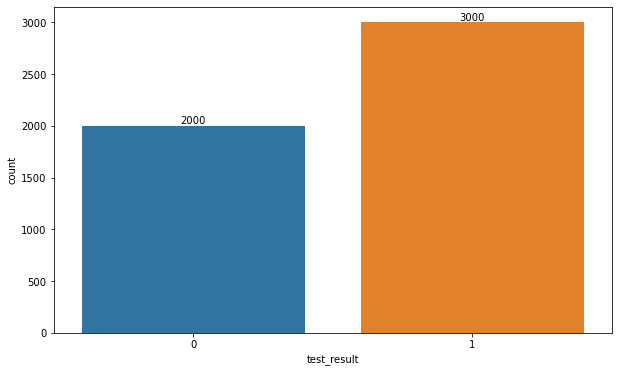

In [7]:
ax = sns.countplot(data=df, x=df['test_result'])
ax.bar_label(ax.containers[0]);

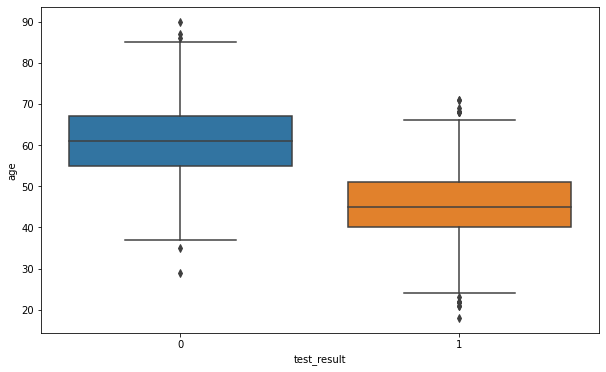

In [8]:
sns.boxplot(x='test_result',y='age',data=df);

# Yaşlara göre box plotlara baktığımızda işitme testinden geçenlerin yaş ortalaması 45 civarlarındayken, geçemeyenlerin
# yaş ortalaması 60 civarlarında diyebiliriz. Kısaca genç yaşta olanların testi geçme olasılığı artıyor diyebiliriz.

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

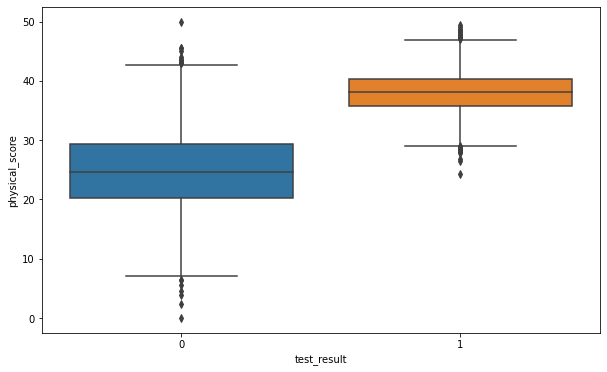

In [9]:
sns.boxplot(x='test_result',y='physical_score',data=df)

# Fiziksel skorlara göre box plotlara baktığımızda işitme testinden geçenlerin fiziksel score ortalaması 37 civarlarındayken, 
# geçemeyenlerin fiziksel score ortalaması 25 civarlarında diyebiliriz. Kısaca fiziksel score yükseldikçe testi geçme olasılığı 
# artıyor diyebiliriz.

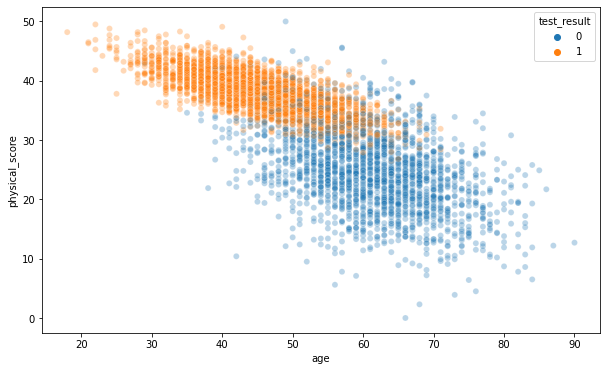

In [10]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.3);

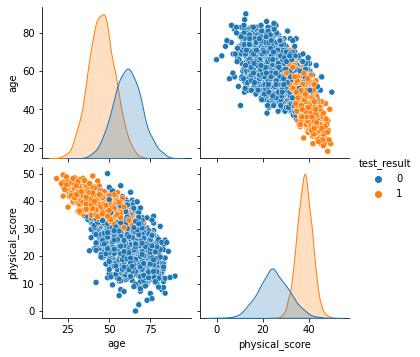

In [11]:
sns.pairplot(df,hue='test_result');

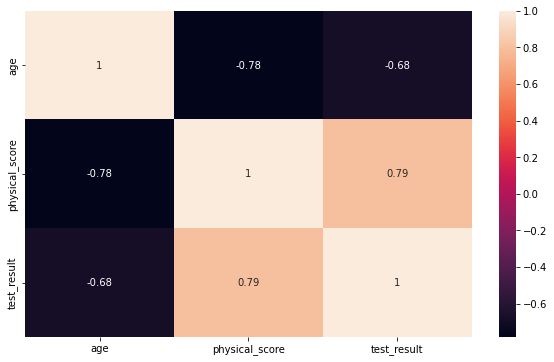

In [12]:
sns.heatmap(df.corr(), annot=True);

## Train | Test Split

In [13]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [16]:
#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

## Modelling

In [17]:
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [18]:
#help(LogisticRegression)

In [19]:
log_model = LogisticRegression()

# Modeli aynı şekilde kuruyoruz.

In [20]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

## Interpretation of coefficients

In [22]:
log_model.coef_

# katsayıların nasıl yorumlandığını aşağıda göreceğiz.

array([[-0.08365972,  0.43251827]])

In [23]:
log_model.intercept_

array([-9.35047287])

In [24]:
b2, b1 = log_model.coef_[0]
print("b2 (age coef)       :", b2)
print("b1 (physical_score) :", b1)

b2 (age coef)       : -0.08365972134083306
b1 (physical_score) : 0.4325182652459216


In [25]:
b0 = log_model.intercept_[0]
print("b0 (intercept) :", b0)

b0 (intercept) : -9.350472872727714


## Linear to Sigmoid Conversion

**The probability** that an event will occur is the possibility you expect to see that event in many trials. 

**Probabilities** always range between 0 and 1. 

**The odds** are defined as the probability that the event will occur divided by the probability that the event will not occur.

https://towardsdatascience.com/a-simple-interpretation-of-logistic-regression-coefficients-e3a40a62e8cf

In [26]:
def sigmoid(age, physical_score):

    log_odds = b2*age + b1*physical_score + b0 # b2*X2 + b1*X1 + b0
    probability = 1 / (1+np.exp(-log_odds))
    return probability

# Logistik regression bizim bildiğimiz clasicc linear regression denklemimizi (b2*X2 + b1*X1 +b0) yukarıdaki fonksiyonu
# kullanarak olasılığa (probability) dönüştürür.

### The probability and odds of passing the hearing test for age = 33, physical_score= 40

In [27]:
probability_age_33 = sigmoid(33, 40)
probability_age_33

# 33 yaşında olan ve fiziksel scoru 40 olan bir kişinin işitme testini geçme olasılığı % 99,45'dir.

0.9944560404714694

In [28]:
probability_age_34 = sigmoid(34, 40)
probability_age_34

0.9939751954408242

## Modeling with Scaling Data

In [29]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [30]:
pipe_model["logistic"].coef_

# bu katsayılar üzerinden de yorumlama yapabilirdik ancak bu seferki yorumlarımız yaştaki veya fiziksel scordaki 1 z-scorluk
# artış/azalış şeklinde olacaktı ve doğal olarak anlaşılması daha zor olacaktı.

array([[-0.94953524,  3.45991194]])

In [31]:
pipe_model["logistic"].intercept_

array([0.48867341])

In [32]:
#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [33]:
#log_model = LogisticRegression()
#log_model.fit(X_train_scaled, y_train)

In [34]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [35]:
y_pred = pipe_model.predict(X_test)
y_pred

# predict test datasının hangi classlara ait olduğunu tahmin eder.

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [36]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

# predict_proba test datasındaki gözlemlerin hangi olasılıkla hangi sınıfa atandığını gösterir. İlk değer 0 sınıfına ait olma
# olasılığı iken ikinci değer 1 sınıfına ait olma olasılığını gösterir. Hangi değer büyükse o sınıfa atanır. 

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

## X_test + y_yest + y_pred + y_pred_proba

In [37]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

# Öncelikle X_test ve y_test concate ederek test_data df'ini elde ediyoruz.

,age,physical_score,test_result
1718,39.0,37.8,1
2511,45.0,38.7,1
345,56.0,21.8,0
2521,40.0,44.0,1
54,64.0,25.4,0
...,...,...,...
4770,46.0,37.7,1
188,59.0,36.5,1
3335,54.0,22.8,0
4583,58.0,20.5,0


In [38]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

# Ve test_data df'ine 1 sınıfına ait olma olasılıklarını gösteren pred_proba sütununu/featurenı ilave ediyoruz.

,age,physical_score,test_result,pred_proba
1718,39.0,37.8,1,0.976157
2511,45.0,38.7,1,0.973076
345,56.0,21.8,0,0.010806
2521,40.0,44.0,1,0.998092
54,64.0,25.4,0,0.024987
...,...,...,...,...
4770,46.0,37.7,1,0.955993
188,59.0,36.5,1,0.813195
3335,54.0,22.8,0,0.019392
4583,58.0,20.5,0,0.005285


In [39]:
test_data["pred"] = y_pred
test_data

#Model predict işlemini yaparken arka planda 0.5 ve 0.5'den büyük olan olasılıkları 1 classına, 0.5'den küçük olan olasılıkları 
#ise 0 classına atıyor. Modelin yaptığı predictionları pred feature olarak test_data df'ine ilave ediyoruz.

,age,physical_score,test_result,pred_proba,pred
1718,39.0,37.8,1,0.976157,1
2511,45.0,38.7,1,0.973076,1
345,56.0,21.8,0,0.010806,0
2521,40.0,44.0,1,0.998092,1
54,64.0,25.4,0,0.024987,0
...,...,...,...,...,...
4770,46.0,37.7,1,0.955993,1
188,59.0,36.5,1,0.813195,1
3335,54.0,22.8,0,0.019392,0
4583,58.0,20.5,0,0.005285,0


## Model Performance on Classification Tasks

In [40]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# skleran. metrics familyasından precision_score, recall_score, accuracy_score, f1_score metriclerimizi import ediyoruz

In [41]:
accuracy_score(y_test,y_pred)

# Bu metric datamda gerçek değerlerin ne kadarını doğru bildiğimi gösteriyor

0.93

In [42]:
pipe_model.score(X_test, y_test)

# score fonksiyonu içine X_test, y_test verdiğimizde accuracy scoru döndürür.

0.93

In [43]:
precision_score(y_test, y_pred, pos_label=1)

# default olarak 1 clasının precision_scorunu döndürür. 1 clasını doğru tahmin etmek için yapılan tahminlerden ne kadarının
# isabetli olduğunu gösterir. precision 0.1 demek model yaptığı tahminlerin %10'ununu tutturdu anlamına gelir.

# 0 clasına ait score için pos_label=0 olarak düzenlenmelidir.

0.9331210191082803

In [44]:
recall_score(y_test, y_pred,  pos_label=1)

# default olarak 1 clasının recall_scorunu döndürür. Modelin 1 classından ne kadarını doğru tespit edebildiğini gösterir.
# recall 0.1 demek model 1 clasının sadece %10'nunu tespit edebilmiş anlamına geliyor.

# 0 clasına ait score için pos_label=0 olarak düzenlenmelidir.

0.9543973941368078

In [45]:
f1_score(y_test,y_pred)

# precision ve recall scorlarının harmonic ortalamasını döndürür. Precision ve recall scorları arasında her zaman bir trade-off
# vardır. precision artarsa/azalırsa recall azalır/artar.

0.9436392914653785

In [46]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay #plot_confusion_matrix


In [47]:
confusion_matrix(y_test,y_pred)

# confition_matrix sade gösterimidir. True label ve predicted label eksenleri gösterilmediğinden kafa karışıklığına 
# neden olabilir.

array([[172,  21],
       [ 14, 293]], dtype=int64)

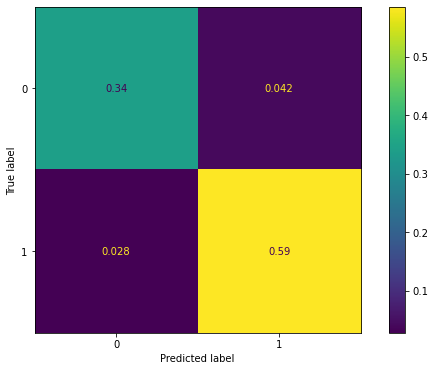

In [48]:
#manuel prediction yapmadan bu fonksiyonun çalıştığından bahset
ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test,normalize='all')
#plot_confusion_matrix(pipe_model, X_test, y_test, normalize='all');

# True label ve predicted label eksenleri gösterildiğinden yorumlanması daha kolaydır.
# TP, FP, TN, FN confition matrix üzerinden çıkarılır.

# normalize="true" true labela göre orantılar.
# normalize="pred" predicted labela göre orantılar.
# normalize="all" tüm dataya göre orantılar.

In [49]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
# hem train hem de test seti scorlarını gözlemleyebilmek için eval_metrc fornksiyonumuzu tanımlıyoruz.

In [50]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# 1 label'ı için konuşacak olursak. 
# precision 0.93 demek yaptığım tahminlerin %93'ü isabetli anlamına geliyor.
# recall 0.95 demek gerçekte 1 olan classların %95'ini doğru tespit ettim anlamına geliyor.
# f1 score precision ve recall scorlarının harmonic ortalmasını verdiğinden hedef metricinize (recall, precision)  göre 
# yorumlanması gerekir. Tek başına yorumlanması yanlış yorumlanmaya sebep verir.

# Datada overfiting olup olmadığı hedef classın test ve train scorları karşılaştırılarak karar verilir. Train setinin
# scorları test datasından çok daha iyi ise arada uçurum var ise overfiting var demektir.

# Ancak datanın genelindeki train ve test datasına bakarak overfiting/underfiting kararı vermiyoruz. Kesin overfiting / 
# underfiting kararını cross_validation sonrası vereceğiz.

Test_Set
[[172  21]
 [ 14 293]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500


Train_Set
[[1567  240]
 [ 147 2546]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



## Cross Validate

In [51]:
from sklearn.model_selection import cross_validate

In [52]:
import sklearn
sklearn.metrics.SCORERS.keys()

# classification modelleri için yapacağımız cross_validation ve gridsearchcv için kullanacağımız metriclerin
# listesi. Bu listeden kullanacağım 'accuracy', 'precision','recall','f1' metriclerini alıyorum sadece.

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [53]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))


# cross_validation üzerinden kesin overfiting/underfiting kararını verebilmek için her iterasyonda hem train hem de validation
# seti scorlarını karşılaştırabilmek için return_train_score=True olarak düzenliyoruz.

# Eğer datamıza scaling işlemi uyguladıysak Data leakegeyi engellemek için CV ve gridsearch işlemlerinde mutlaka pipeline
# kullanmamız gerektiğini unutmuyoruz.

# Aşağıda döndürülen scorlar her zaman 1 clasına ait scorlardır. 0 clasına ait metriclerin CV scorları için ilave
# başka işlemler yapmamız gerekiyor. Sonraki derste örneği gösterilecektir.

In [54]:
df_scores.mean()[2:]

# 1 labelına ait olan train ve validation scorları bu aşamada karşılaştırılıp kesin overfiting/undefiting kararı veriliyor.
# Aşağıdaki scorlara göre overfiting olmadığını söyleyebiliriz.

test_accuracy      0.914667
train_accuracy     0.914000
test_precision     0.914709
train_precision    0.913790
test_recall        0.946138
train_recall       0.945496
test_f1            0.929875
train_f1           0.929373
dtype: float64

In [55]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# Burdan aldığımız scorlar modelin kesin ve nihai scorlarıdır. Bu scorlar modelin genel performansı olarak müşteriye verilecek 
# olan scorlardır. Bu scorların gerçekten tutarlı scorlar olup olmadığına CV'dan aldığımız validation seti scorları ile 
# karşılaştırarak karar veriyoruz. Eğer scorlar birbiren yakınsa test datasının scorları tutarlıdır diyebiliriz.

Test_Set
[[172  21]
 [ 14 293]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500


Train_Set
[[1567  240]
 [ 147 2546]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

Purpose of ROC Curve:

    1. Analysing the strength/predictive power of a classifier.
    
    2. Determining optimal threshold.
    
    3. Comparing two models (using Area Under the Curve).

AUC represents a degree or measure of separability. It tells us how much the model is capable of distinguishing between classes.

The ROC Curve was first used during World War II for the analysis of radar signals. After the attack on Pearl Harbor, the US army began new research to improve the rate of detection of Japanese aircraft from their radar signals. Needless to say, they did not want to miss any of them. Neither did they wish to waste their resources on false alarms. They measured the ability of a radar receiver operator to make these predictions called the Receiver Operating Characteristic. That is the origin of the name. The purpose of the curve was similar to how we use it to improve our machine learning models now. The aim was to analyse the predictive power of the predictor in ensuring the detection of as many true positives as possible while minimizing false positives.

https://towardsdatascience.com/demystifying-roc-curves-df809474529a

## ROC AUC Curve

![ROC.gif](attachment:ROC.gif)

## ROC AUC Curve

![ROC.gif](attachment:ROC.gif)

## ROC AUC and Precision Recall Curve

![PR.gif](attachment:PR.gif)

## For Imbalanced Data ROC AUC and Precsion-Recall Curve

![imbalance.gif](attachment:imbalance.gif)

In [56]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay
#plot_roc_curve, plot_precision_recall_curve

# classification problemlerinde model performansı için baktığımız metriclerden bir tanesi de dengeli data setleri için
# ROC-AUC scoru, dengesiz data setleri için average precision scoruna bakılır.

# dengesiz data setleri için AUC score çok daha iyimser scorlar (yanlış scorlar) döndürdüğünden kullanılmaz.

# bu scorlar modelin genel performansı olarak isimlendirilir ve modelin hedef classımızı diğer class/classlardan ayrıştırma da
# ne kadar başarılı olduğunu gösterir.

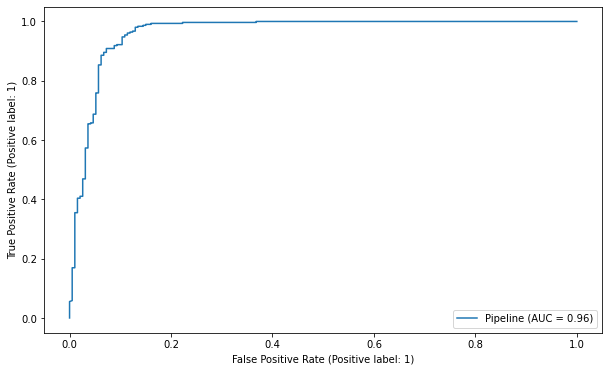

In [57]:
#plot_roc_curve(pipe_model, X_test, y_test);
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test)
# datam dengeli olduğundan AUC scoruna bakıyoruz. AUC =0.96 modelim 1 labelını 0 labelından ayrıştırmada ortalama %96 oranında
# başarılı demek.

In [58]:
roc_auc_score(y_test, y_pred_proba[:,1])

# AUC scru için y_test ile 1 sınıfına ait olam olasılıkları roc_auc_score fonksiyonu içine birlikte verilir.

0.9630132824762451

In [59]:
roc_auc_score(y_test, y_pred)

# y_pred verilmez aksi takdirde aldığınız score yanlış olur.

0.9227945519906837

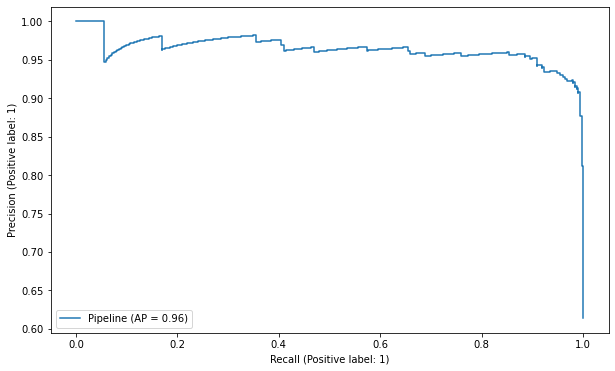

In [60]:
#plot_precision_recall_curve(pipe_model, X_test, y_test);
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test)

# dengeli data setlerinde hem AUC score hem de Average precision score birbirlerine yakın değerler döndürse de
# dengeli data setleri için AUC, dengesiz veri setleri için average precision scorlarını kullanmayı alışkanlık haline getirelim.

## Final Model and Model Deployment without Pipeline

In [61]:
scaler = StandardScaler().fit(X)

In [62]:
import pickle
pickle.dump(scaler, open("scaler_hearing", 'wb'))

In [63]:
X_scaled = scaler.transform(X)

In [64]:
final_model = LogisticRegression().fit(X_scaled, y)

In [65]:
pickle.dump(final_model, open("final_model_hearing", 'wb'))

In [66]:
my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [67]:
sample = pd.DataFrame(my_dict)
sample

,age,physical_score
0,20,50
1,30,30
2,40,20
3,50,10
4,60,5


In [68]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [69]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [70]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [71]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [72]:
predictions

array([1, 1, 0, 0, 0], dtype=int64)

In [73]:
predictions_proba[:,1]

array([9.99970203e-01, 7.30358070e-01, 1.61805230e-02, 9.98533190e-05,
       5.25930939e-06])

## Final Model and Model Deployment with Pipeline

In [74]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [75]:
import pickle
pickle.dump(final_model, open("final_pipe_model", 'wb'))

In [76]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [77]:
new_model.predict(sample)

array([1, 1, 0, 0, 0], dtype=int64)

In [78]:
new_model.predict_proba(sample)[:,1]

array([9.99970203e-01, 7.30358070e-01, 1.61805230e-02, 9.98533190e-05,
       5.25930939e-06])

In [79]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba
0,20,50,1,0.999970
1,30,30,1,0.730358
2,40,20,0,0.016181
3,50,10,0,0.000100
4,60,5,0,0.000005
